In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from copy import deepcopy
from functools import partial
from itertools import combinations

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder

# Import libraries for Hypertuning
import optuna
# Import libraries for gradient boosting
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool
from hyperopt import STATUS_OK,Trials, fmin,hp,tpe

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from skopt import gp_minimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from collections import OrderedDict
import optuna

In [289]:
import keras
from prettytable import PrettyTable
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense , Dropout 
from sklearn.preprocessing import PowerTransformer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.metrics import log_loss

In [290]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
trainfor = pd.read_csv("train.csv")

In [291]:
test_df

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775
...,...,...,...,...,...,...,...,...,...
78372,195936,119.328125,46.449223,0.227636,0.161986,1.120401,13.883072,14.153556,213.485463
78373,195937,125.835938,43.986678,0.078460,0.077917,2.342809,13.008583,9.907167,136.815454
78374,195938,131.789062,43.493074,0.049140,0.402859,2.116221,14.639555,10.898768,147.929016
78375,195939,79.476562,42.579993,0.817383,1.818474,1.903010,15.844982,10.723755,143.273847


In [292]:
original = pd.read_csv("pulsar.csv")

In [293]:
sp = pd.read_csv("sample_submission.csv")

In [294]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,117564.0,58781.500000,33937.947861,0.000000,29390.750000,58781.500000,88172.250000,117563.000000
Mean_Integrated,117564.0,111.248300,24.906474,6.054688,104.546875,116.664062,126.296875,189.367188
SD,117564.0,46.713535,6.102941,24.783273,43.443390,47.478932,50.862718,93.602933
EK,117564.0,0.503498,1.127093,-1.730782,0.049761,0.186498,0.395620,7.879628
Skewness,117564.0,1.886385,6.515466,-1.791886,-0.188956,0.091720,0.691613,65.385974
Mean_DMSNR_Curve,117564.0,11.962921,26.719946,0.213211,2.090301,2.808528,4.122910,217.371238
SD_DMSNR_Curve,117564.0,26.190678,20.041937,7.370432,14.955405,18.164924,24.732218,109.890785
EK_DMSNR_Curve,117564.0,8.037488,3.840980,-2.597872,6.742911,8.442883,10.003237,34.539844
Skewness_DMSNR_Curve,117564.0,93.881076,79.962110,-1.976976,49.409136,83.421375,122.093290,1191.000837
Class,117564.0,0.093285,0.290833,0.000000,0.000000,0.000000,0.000000,1.000000


In [295]:
train_dfcol = train_df.drop(['id', 'Class'], axis =1)


In [296]:
train_df

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0
...,...,...,...,...,...,...,...,...,...,...
117559,117559,132.843750,56.748838,-0.060070,-0.554084,4.054348,27.844144,6.564423,44.442664,0
117560,117560,112.578125,52.539271,0.179580,-0.306961,1.637960,15.331913,11.384718,142.535470,0
117561,117561,119.757812,49.980013,0.064402,-0.270822,3.877926,19.788559,6.959740,56.367789,0
117562,117562,105.789062,46.986595,0.441426,0.372466,2.097826,17.170612,9.442445,99.074539,0


In [297]:
train_dfcol.columns 

Index(['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve'],
      dtype='object')

In [298]:
def boxciz(df,ft) :
    df.boxplot([ft])
    plt.grid(False)
    plt.show
    

(None,)

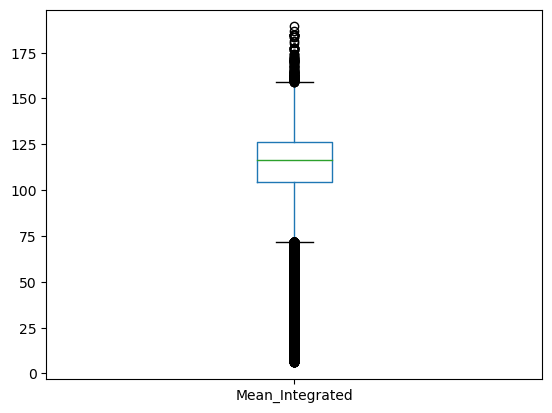

In [299]:

boxciz(train_df,"Mean_Integrated"),

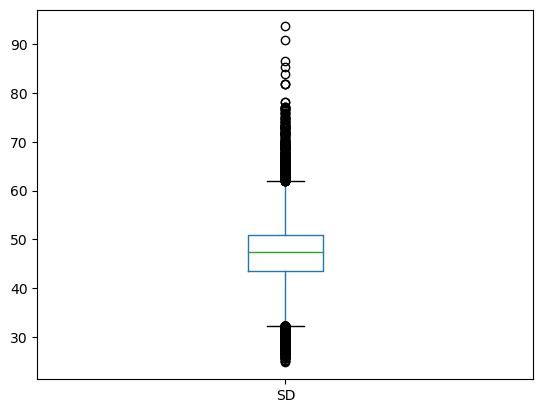

In [300]:
boxciz(train_df,"SD")

<AxesSubplot:xlabel='SD', ylabel='Count'>

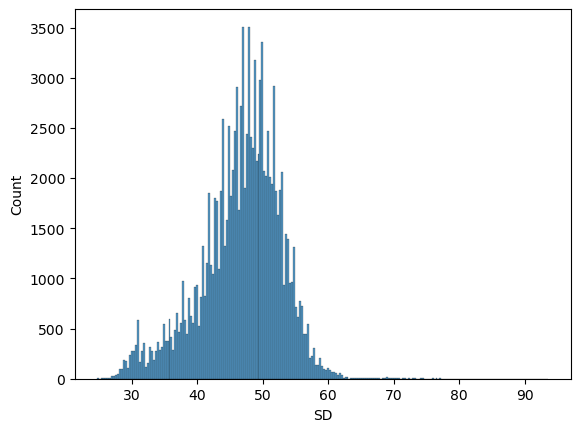

In [301]:
sns.histplot(train_df,  x = train_df.SD )

In [302]:
train_df.shape,test_df.shape

((117564, 10), (78377, 9))

In [303]:
train = pd.concat([train_df,original])
train = train.reset_index(drop=True)

In [304]:
trainfor = pd.concat([train_df,original])
trainfor = trainfor.reset_index(drop=True)

In [305]:
train = train.drop(columns = ["id"], axis = 1)

In [306]:
outliers = train[
    (train['Class']==1)&
    (train['Mean_Integrated']>115)&
    (train['SD']>45)&
    (train['EK']<0.03)&
    (train['Skewness']<1)&
    (train['Mean_DMSNR_Curve']<20)
].index

In [307]:
train

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0
...,...,...,...,...,...,...,...,...,...
135457,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
135458,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
135459,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
135460,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [308]:
outliers

Int64Index([15488, 74299, 76395, 111145, 122354, 122706], dtype='int64')

In [309]:
train = train.drop(outliers)

In [310]:
test_df = test_df.drop(columns = "id")

In [311]:
train = train.drop(columns = "Class")

In [312]:
power_transformer = PowerTransformer()
train2 = power_transformer.fit_transform(train)
test_df = power_transformer.transform(test_df)

In [313]:
train2 = pd.DataFrame(train2)
test_df = pd.DataFrame(test_df)

In [314]:
trainfor = trainfor.drop(outliers)

In [318]:
trainfor

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0.0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1.0,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2.0,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3.0,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4.0,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0
...,...,...,...,...,...,...,...,...,...,...
135457,NaN,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
135458,NaN,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
135459,NaN,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
135460,NaN,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


modeling

mdl_stack = StackingRegressor(estimators = [('lgbm',LGBMRegressor()),('catboost',CatBoostRegressor(learning_rate = 0.01,iterations = 3000,verbose = 100,
       random_seed = 42))],final_estimator = LGBMRegressor())
mdl_stack.fit(X1,y)

aşağıdaki kod standart scaler içindir

In [326]:
scaler = StandardScaler()

X_train = train2
Y_train = trainfor.Class

X_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns,index = X_train.index)
test_df2 = pd.DataFrame(scaler.transform(test_df),columns = test_df.columns,index = test_df.index)

In [327]:
x_train,x_valid,y_train,y_valid = train_test_split(X_scaled,Y_train,test_size=0.2, random_state=5)

In [328]:
model = keras.Sequential([
    layers.Dense(8,activation = 'relu' ,input_shape = [x_train.shape[1]] ),
    layers.Dense(8,activation = 'relu'),
    layers.Dense(8,activation = 'relu'),
    layers.Dense(8,activation = 'relu'),
    layers.Dense(8,activation = 'relu'),
    layers.Dense(8,activation = 'relu'),
    layers.Dense(8,activation = 'relu'),
    layers.Dense(8,activation = 'relu'),
    layers.Dense(8,activation = 'relu'),
    
    layers.Dense(32,activation = 'relu'),
    
    layers.Dense(1,activation = 'sigmoid')
    
])

In [329]:
model.compile(optimizer='Adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'],)


In [330]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_valid,y_valid),
    batch_size=512,
    epochs =100,
#     class_weight={0:1,1:1.2}
    #verbose = 0
)

Epoch 1/100
212/212 [==============================] - 2s 4ms/step - loss: 0.2032 - binary_accuracy: 0.9369 - val_loss: 0.0561 - val_binary_accuracy: 0.9852
Epoch 2/100
212/212 [==============================] - 1s 3ms/step - loss: 0.0448 - binary_accuracy: 0.9876 - val_loss: 0.0459 - val_binary_accuracy: 0.9880
Epoch 3/100
212/212 [==============================] - 1s 3ms/step - loss: 0.0410 - binary_accuracy: 0.9887 - val_loss: 0.0441 - val_binary_accuracy: 0.9883
Epoch 4/100
212/212 [==============================] - 1s 3ms/step - loss: 0.0400 - binary_accuracy: 0.9889 - val_loss: 0.0437 - val_binary_accuracy: 0.9881
Epoch 5/100
212/212 [==============================] - 1s 3ms/step - loss: 0.0393 - binary_accuracy: 0.9888 - val_loss: 0.0438 - val_binary_accuracy: 0.9877
Epoch 6/100
212/212 [==============================] - 1s 3ms/step - loss: 0.0387 - binary_accuracy: 0.9891 - val_loss: 0.0429 - val_binary_accuracy: 0.9884
Epoch 7/100
212/212 [==============================] - 1s 

<AxesSubplot:title={'center':'Accuracy'}>

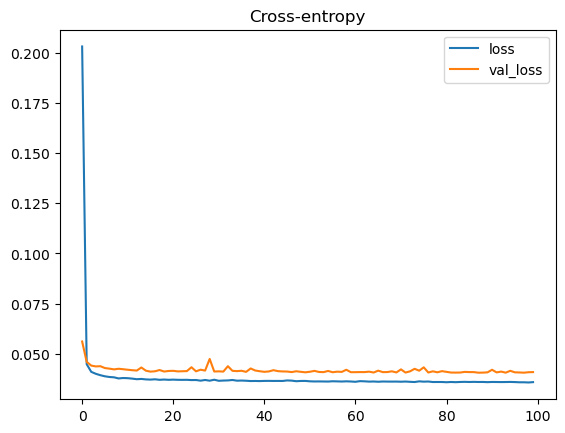

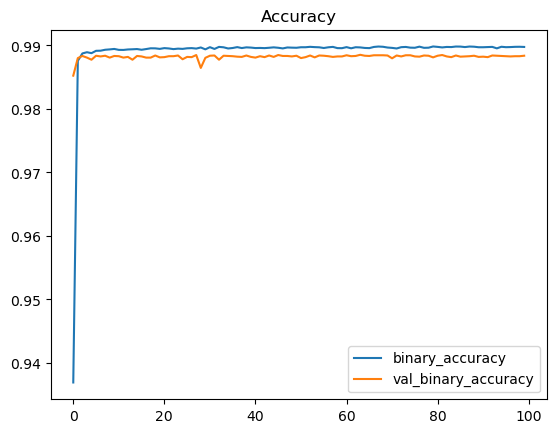

In [332]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot(title = 'Cross-entropy')
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot(title = 'Accuracy')

In [333]:
preds = model.predict(x_valid)
log_loss(y_valid,preds)

847/847 [==============================] - 1s 1ms/step


0.04084391042223202

In [336]:
rpreds = model.predict(test_df2)

2450/2450 [==============================] - 4s 1ms/step


In [337]:
sp["Class"] = rpreds

In [338]:
sp.to_csv("deneme2.csv",index = False)